In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('VAE1718_NoOutliers_BSEV_F_Young1.xlsx')

In [3]:
df

,AGE_YRS,NUMDAYS,VAX_DOSE_SERIES,M/F,BIRTHDEF_Y/N,NUM_SYMPS,SYMP_SEV,MEDS_Y/N,CILL_Y/N,HIST_Y/N,...,AR,GM,LA,LG,LL,MO,NS,RA,RL,SEVERITY
0,35.00,18,1,1,0,2,2.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,52.00,3,2,1,0,1,0.000000,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,11.00,52,1,1,0,2,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,16.00,0,1,0,0,3,1.333333,1,1,1,...,0,0,0,0,0,0,0,1,0,1
4,11.00,0,1,0,0,2,0.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5,36.00,0,3,0,0,3,1.000000,0,1,1,...,0,0,0,0,0,0,0,0,1,0
6,10.00,2,1,0,0,3,5.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,17.00,0,1,0,0,5,0.800000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,55.00,0,1,1,0,5,0.000000,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,4.00,1,1,0,0,1,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,0


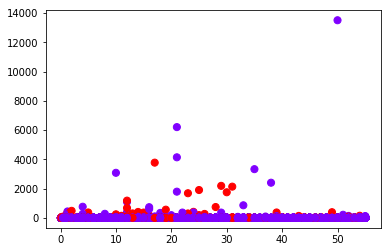

In [4]:
array = df.values
X = array[:,0:2]
Y = array[:,-1]
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='rainbow');

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier().fit(X, Y)



In [6]:
def visualize_classifier(model, X, Y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=cmap,
               clim=(Y.min(), Y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, Y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(Y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(Y.min(), Y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    #ax.set_ylim(0,50)



E:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


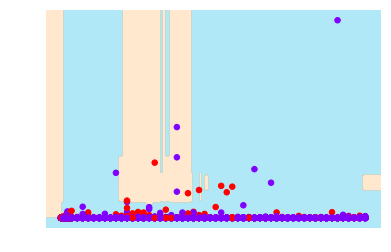

In [7]:
visualize_classifier(BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,
                                       n_jobs=-1,oob_score=True), X, Y)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y)
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.8678015211879754

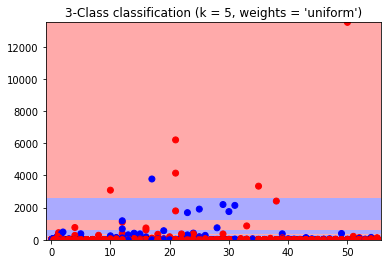

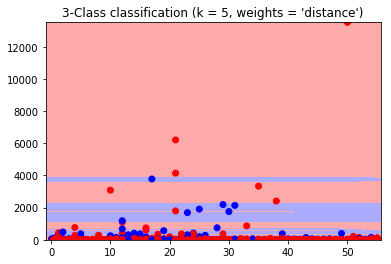

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5
h=0.5
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()